In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
tweets['word count'] = tweets['text'].map(lambda x: len(x.split()))
real = tweets.loc[tweets['target'] == 1]
fake = tweets.loc[tweets['target'] == 0]

grouped = tweets.groupby('target').agg({'word count':['min','mean','max']})
difference = grouped.iloc[0]-grouped.iloc[1]
difference = difference.reset_index()
difference = difference.drop('level_0',axis = 1)
difference.columns = ['function','difference']
difference = difference.set_index('function')
difference['positive'] = difference['difference'] > 0

Text(0.5, 0, '')

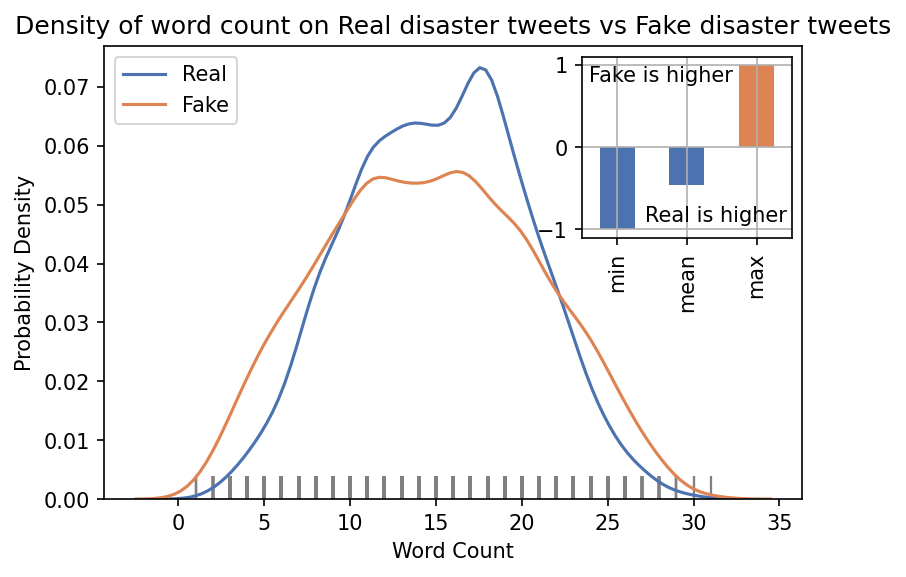

In [3]:
plt.rcParams['figure.dpi'] = 150
fig,ax = plt.subplots()
#plt.rcParams['figure.figsize']=[25.0,7.0]
#plt.rcParams.update({'font.size':22})

sns.distplot(real['word count'], hist = False, color = ListedColormap(sns.color_palette('deep'))(0), label = True)
sns.distplot(fake['word count'], hist = False, color = ListedColormap(sns.color_palette('deep'))(1), rug = True, rug_kws={'color':'grey'}, label = True)
plt.xlabel('Word Count')
plt.ylabel('Probability Density')
plt.title('Density of word count on Real disaster tweets vs Fake disaster tweets')
plt.legend(loc = 'upper left',labels=['Real','Fake'])

axins = inset_axes(ax,"30%","40%",loc = "upper right")
axins.annotate('Fake is higher',xy = (-0.4,0.8))
axins.annotate('Real is higher',xy = (0.4,-0.9))

difference['difference'].plot(kind = 'bar', color=difference.positive.map({True:ListedColormap(sns.color_palette('deep'))(1),False:ListedColormap(sns.color_palette('deep'))(0)}), grid=True, ax= axins)
plt.xlabel('')
